# Практика №1

In [1]:
import iapws
from iapws import IAPWS97 as gas

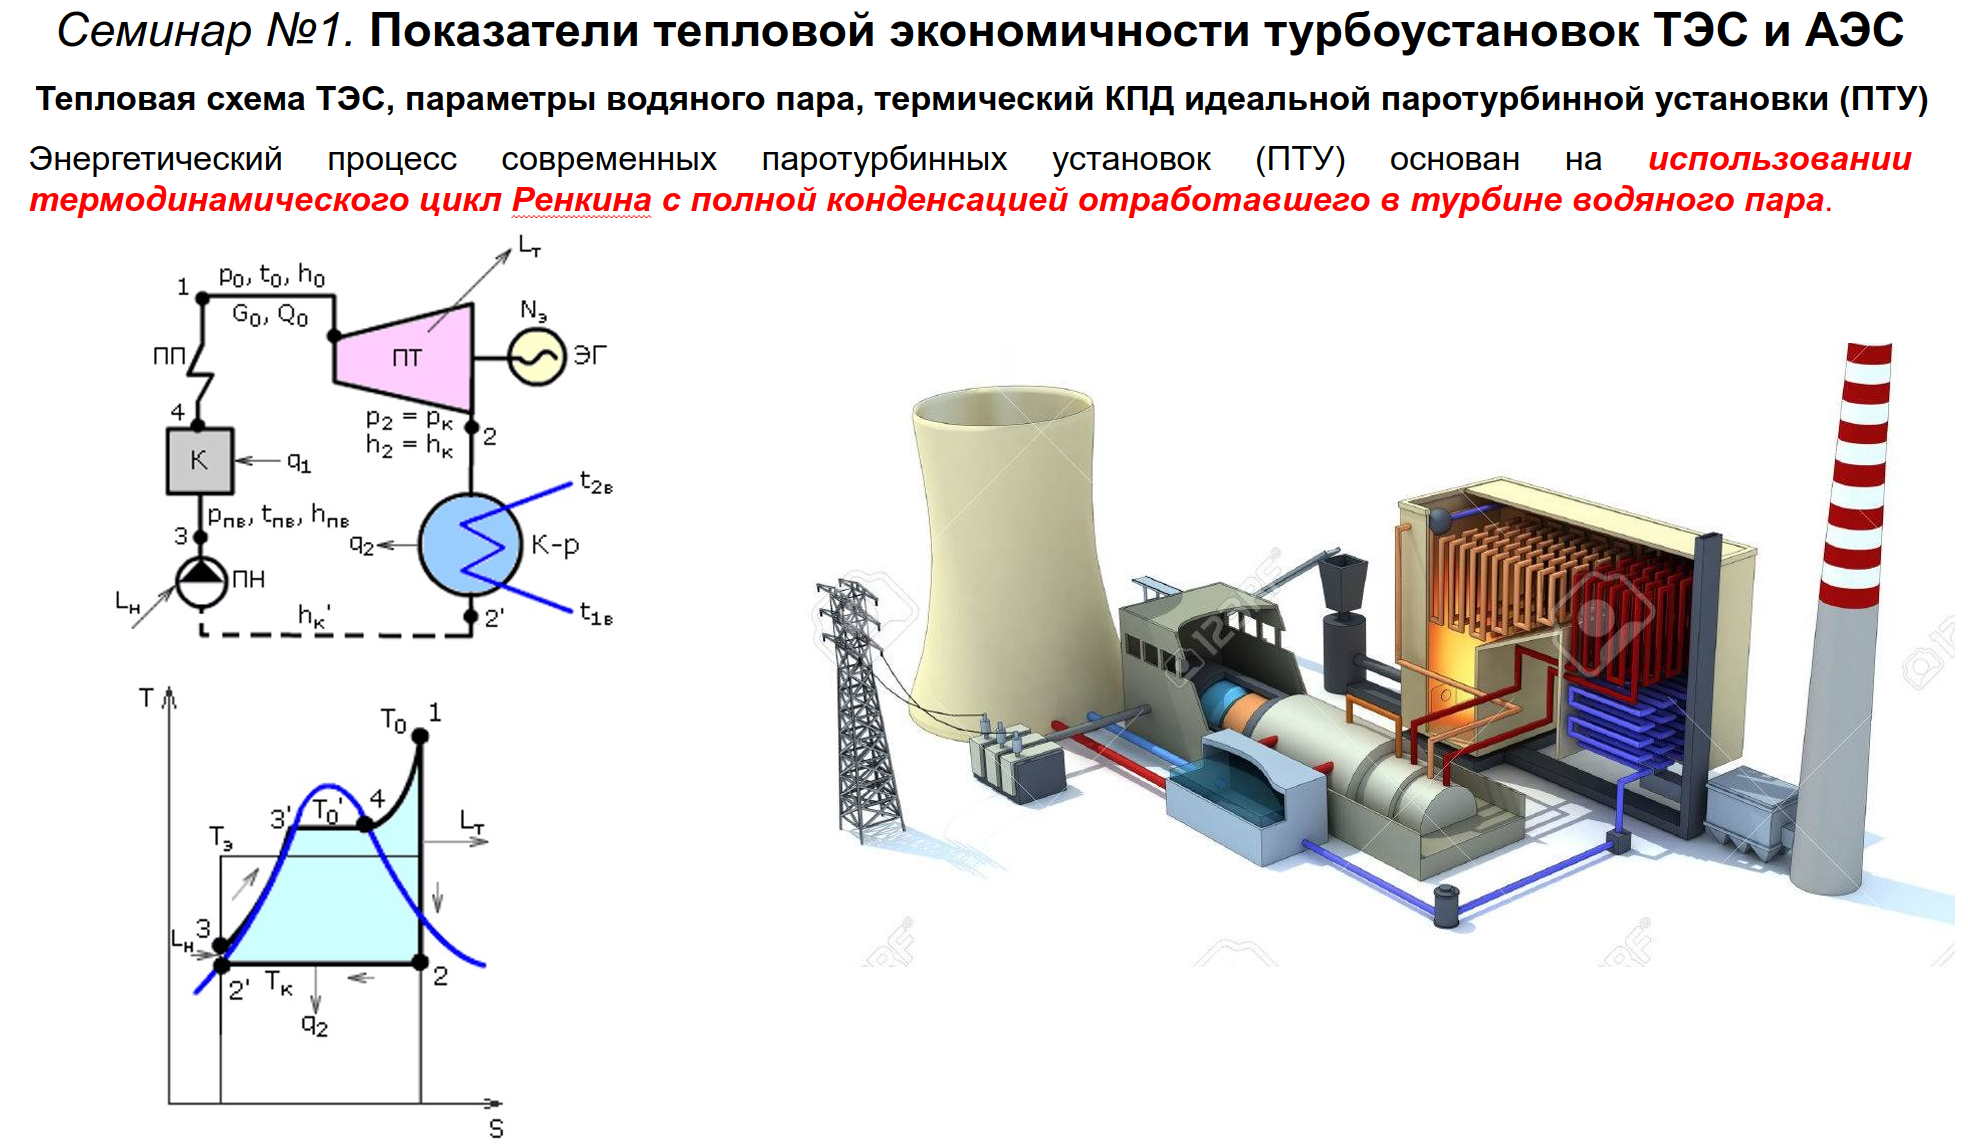

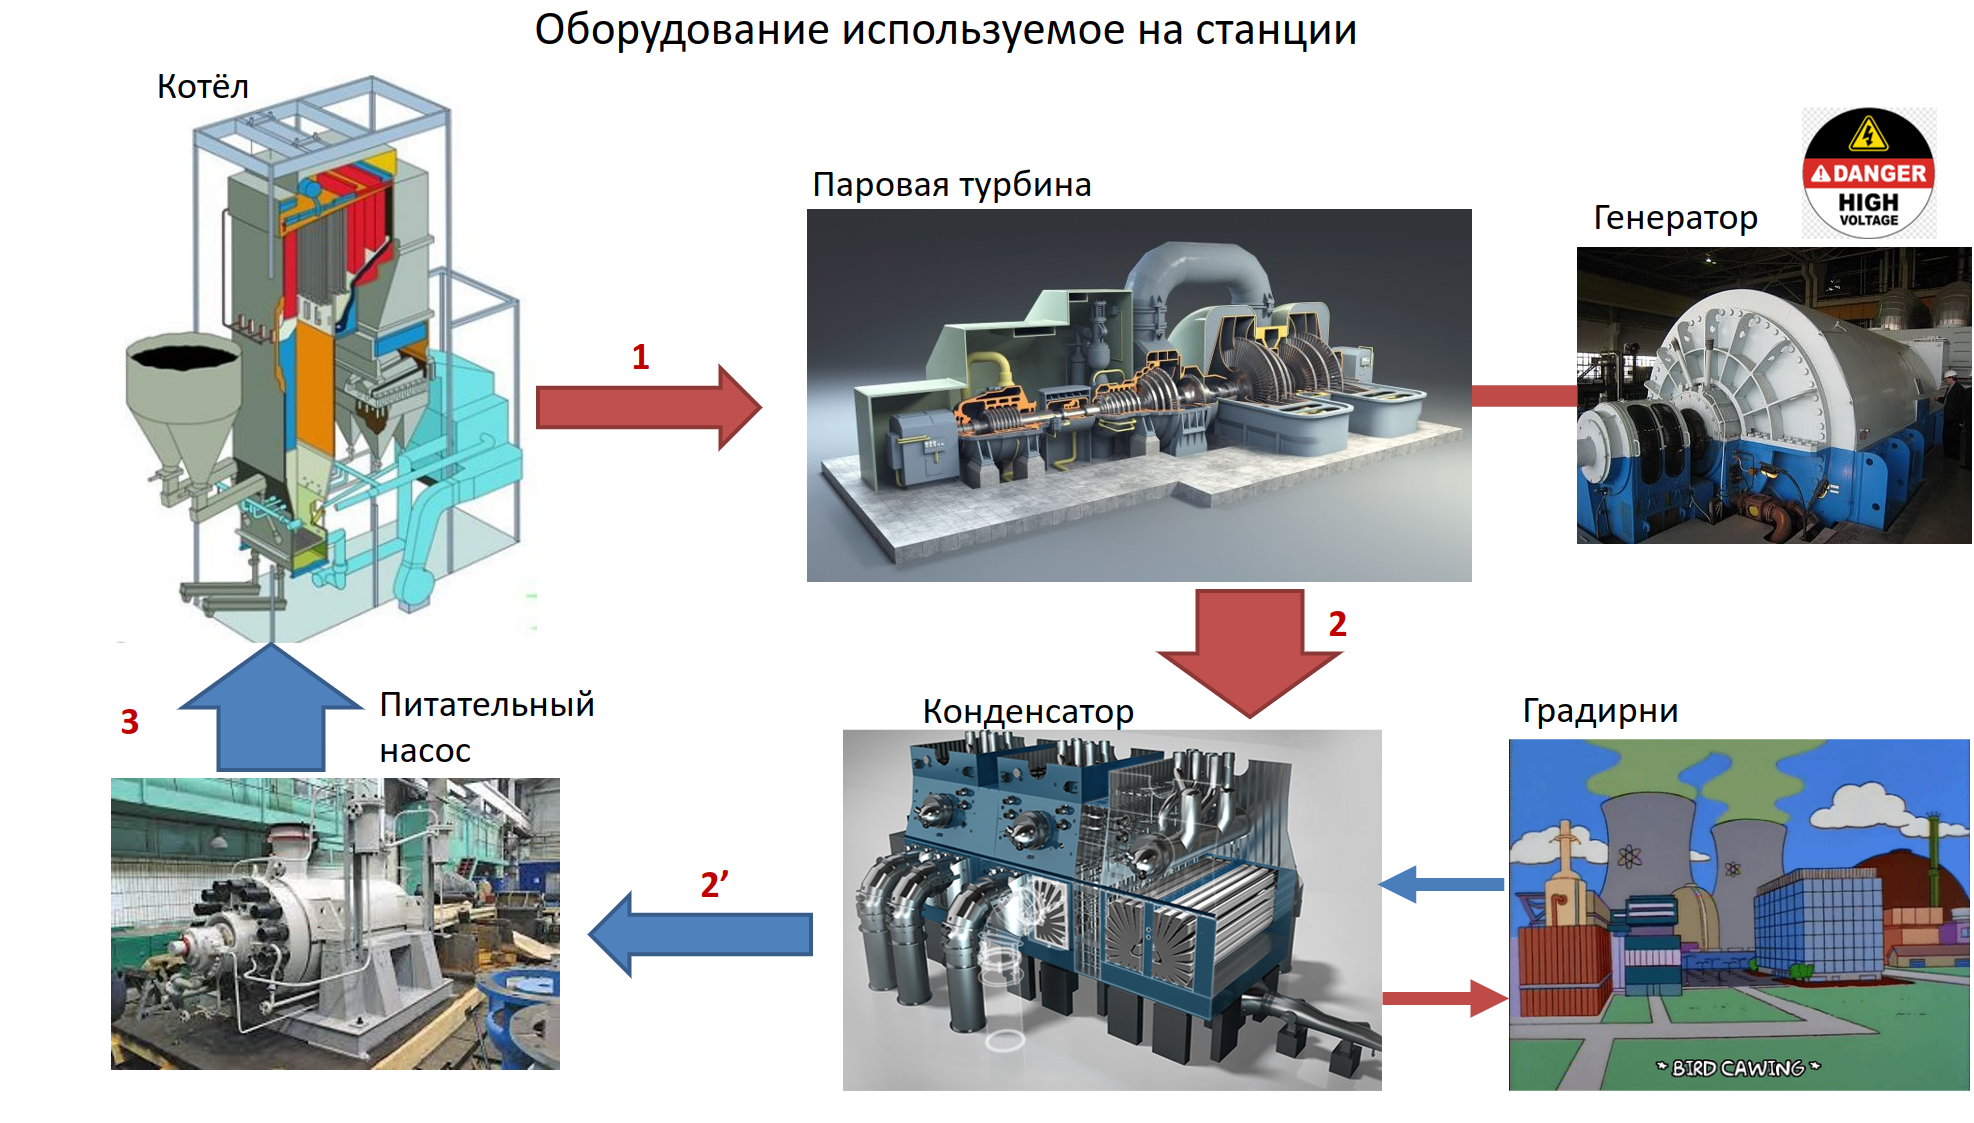

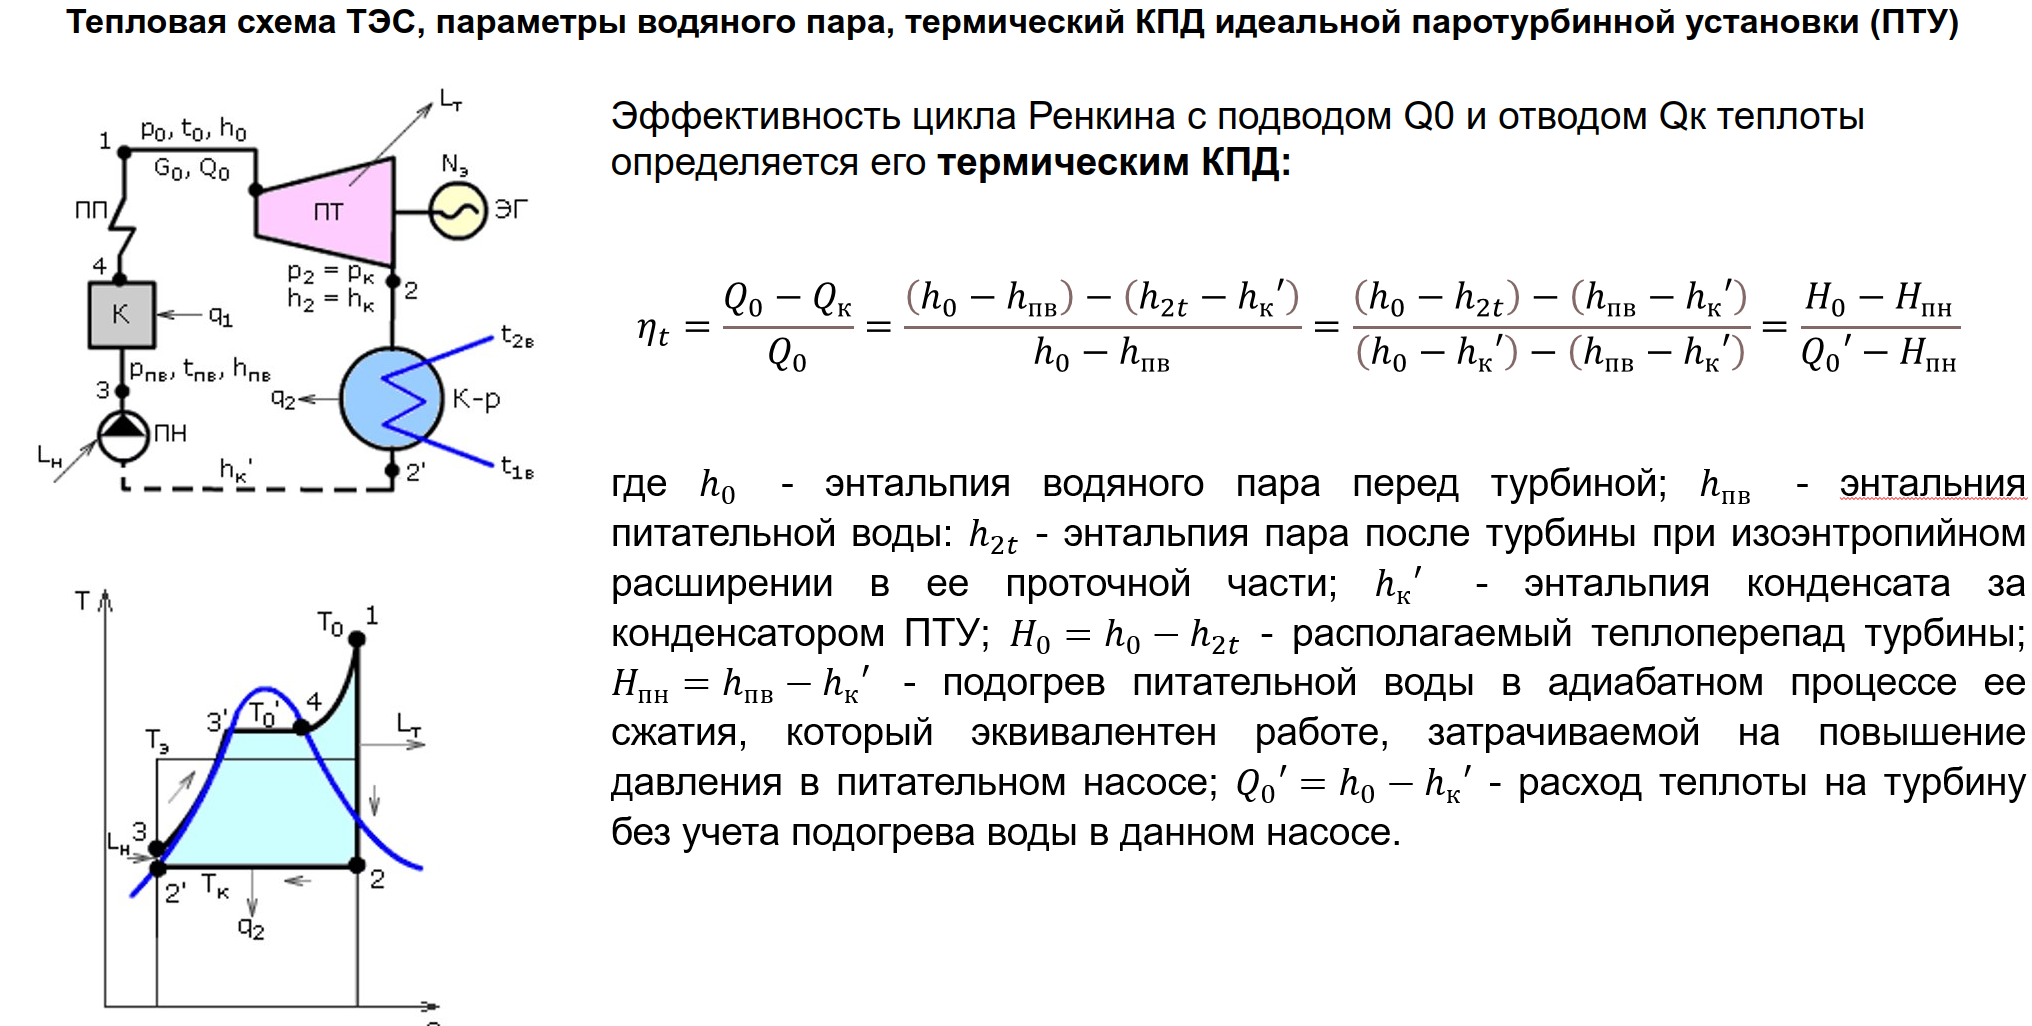

Упростим себе жизнь

In [2]:
MPa = 10 ** 6
kPa = 10 ** 3
unit = 1 / MPa
to_kelvin = lambda x: x + 273.15 if x else None

## Задача 1.1

Определить термический кпд $\eta_t$ паротурбинного цикла без промежуточного перегрева пара при следующих параметрах пара:

$P_0$=9 MPa,  $t_0$=520 $^\circ C$, $P_k$ = 5 kPa

Принять давление за последней ступенью паровой турбины $P_2=P_k$. термический КПД цикла оценить без учета подогрева воды в питательном насосе и регенеративной системе ($h_{п.в.} = h_k`$)

In [3]:
# Начальные параметры:
p_0 = 9 * MPa
p_k = 5 * kPa
t_0 = to_kelvin(520)

In [4]:
# Определим точки, которые нам нужны

point_0 = gas(P=p_0 * unit, T=t_0)
point_condenser_inlet = gas(P=p_k * unit, s=point_0.s)
point_pump_outlet = gas(P=p_k * unit, x=0)

In [5]:
useful_energy = point_0.h - point_condenser_inlet.h
full_energy = point_0.h - point_pump_outlet.h

efficiency = useful_energy / full_energy
print("Ответ на задачу 1:", round(efficiency * 100, 3), "%")

Ответ на задачу 1: 42.056 %


In [6]:
efficiency_old = efficiency

## Задача 1.2

Оценить по отношению к данным задачи `1.1` изменение $\eta_t$ если давление $P_k$ = 3.5 kPa

In [7]:
# Начальные параметры:
p_0 = 9 * MPa
p_k = 3.5 * kPa
t_0 = to_kelvin(520)

In [8]:
# Определим точки, которые нам нужны

point_0 = gas(P=p_0 * unit, T=t_0)
point_condenser_inlet = gas(P=p_k * unit, s=point_0.s)
point_pump_outlet = gas(P=p_k * unit, x=0)

In [9]:
useful_energy = point_0.h - point_condenser_inlet.h
full_energy = point_0.h - point_pump_outlet.h

efficiency = useful_energy / full_energy
efficiency

0.42900886924418374

In [10]:
difference_in_percent = (efficiency - efficiency_old) / efficiency_old
print("Ответ на задачу 1.2:", round(difference_in_percent * 100, 3), "%")

Ответ на задачу 1.2: 2.01 %


## Задача 1.3

Оценить по отношению к данным задачи `1.1` изменение $\eta_t$ если давление $P_0$ = 13 MPa

In [11]:
# Начальные параметры:
p_0 = 13 * MPa
p_k = 5 * kPa
t_0 = to_kelvin(520)

In [12]:
# Определим точки, которые нам нужны

point_0 = gas(P=p_0 * unit, T=t_0)
point_condenser_inlet = gas(P=p_k * unit, s=point_0.s)
point_pump_outlet = gas(P=p_k * unit, x=0)

In [13]:
useful_energy = point_0.h - point_condenser_inlet.h
full_energy = point_0.h - point_pump_outlet.h

efficiency = useful_energy / full_energy
efficiency

0.432529211402011

In [14]:
difference_in_percent = (efficiency - efficiency_old) / efficiency_old
print("Ответ на задачу 1.3:", round(difference_in_percent * 100, 3), "%")

Ответ на задачу 1.3: 2.847 %


## Задача 1.4

Определить термический КПД ПТУ АЭС без промежуточного прегрева пара при следующих параметрах пара:

$P_0$=5.6 MPa, $x_0$=1, $P_k$ = 5 kPa

Принять давление за последней ступенью паровой турбины $P_2=P_k$. термический КПД цикла оценить без учета подогрева воды в питательном насосе и регенеративной системе ($h_{п.в.} = h_k'$). Оценить изменение термического КПД по отношению к данным примера `1.1`.

In [15]:
# Начальные параметры:
p_0 = 5.6 * MPa
p_k = 5 * kPa
x_0 = 1

In [16]:
# Определим точки, которые нам нужны

point_0 = gas(P=p_0 * unit, x=x_0)
point_condenser_inlet = gas(P=p_k * unit, s=point_0.s)
point_pump_outlet = gas(P=p_k * unit, x=0)

In [17]:
useful_energy = point_0.h - point_condenser_inlet.h
full_energy = point_0.h - point_pump_outlet.h

efficiency = useful_energy / full_energy
efficiency

0.37130898787101163

In [18]:
difference_in_percent = (efficiency - efficiency_old) / efficiency_old
print("Ответ на задачу 1.4:", round(difference_in_percent * 100, 3), "%")

Ответ на задачу 1.4: -11.71 %


## Как можно несколько упростить себе жизнь

In [19]:
from typing import Optional, Tuple, List, Union

point_type = iapws.iapws97.IAPWS97


def check_is_valid_numerical(values: List[Union[None, float]]) -> None:
    """
    Проверить список, что все значения являются числами, если существуют
    :param List[Union[None, float]] values: Список из значений для проверки
    :return None:
    """
    for value in values:
        if value:
            if not isinstance(value, (int, float)):
                raise ValueError(f"Argument should be int or float value! Given {type(value)}")


def construct_cycle_points(
    p_0: Union[int, float],
    p_k: Union[int, float],
    t_0: Optional[Union[int, float]] = None,
    x_0: Optional[Union[int, float]] = None, 
) -> Tuple[point_type, point_type, point_type]:
    """
    Собрать точки процесса для расчета КПД
    Функция вернет точку начала процесса расширения в турбине, конца процесса расширения, а так же
    точку после питательного насоса.
    :param Union[int, float] p_0: Давление в MPa перед расширением в турбине
    :param Union[int, float] p_k: Давление в MPa после расширения в турбине
    :param Optional[Union[int, float]] t_0: Температура в K перед расширением в турбине
    :param Optional[Union[int, float]] x_0: Степень сухости пара перед расширением в турбине
    :return Tuple[point_type, point_type, point_type]:
    """
    
    check_is_valid_numerical([p_0, p_k, t_0, x_0])
    if not t_0 and not x_0:
        raise ValueError("Neither t_0 not x_0 is not provided for start expansion point!")
    if not (p_0 and p_k):
        raise ValueError("P_0 and p_k must be specified!")
    if x_0 and (x_0 > 1 or x_0 < 0):
        raise ValueError("x_0 should be between 0 and 1")
        
    if t_0:
        point_0 = gas(P=p_0, T=t_0)
    else:
        point_0 = gas(P=p_0, x=x_0)
    
    p_condenser = gas(P=p_k, s=point_0.s)
    p_pump = gas(P=p_k, x=0)
    
    return point_0, p_condenser, p_pump


def compute_cycle_efficiency(p_0: point_type, p_condenser: point_type, p_pump: point_type) -> float:
    """
    Вычисление термического КПД с упрощениями по точкам входа в турбину,
    выхода из нее и точке выхода питательной воды из насоса.
    :param iapws.iapws97.IAPWS97 point_0: Точка начала расширения пара / входа в турбину
    :param iapws.iapws97.IAPWS97 p_condenser: Точка завершения расширения пара / выхода из турбины
    :param iapws.iapws97.IAPWS97 p_pump: Точка относящаяся к воде после питательного насоса
    :return float: Термический КПД
    """
    useful_energy = p_0.h - p_condenser.h
    full_energy = p_0.h - p_pump.h
    efficiency = useful_energy / full_energy
    return efficiency


def solve_exercise(
    p_0: Union[int, float],
    p_k: Union[int, float],
    t_0: Optional[Union[int, float]] = None,
    x_0: Optional[Union[int, float]] = None,) -> float:
    """
    Решить все задачи с пары за пол секунды и найти КПД! =)
    :param Union[int, float] p_0: Давление в Pa перед расширением в турбине
    :param Union[int, float] p_k: Давление в Pa после расширения в турбине
    :param Optional[Union[int, float]] t_0: Температура в *C перед расширением в турбине
    :param Optional[Union[int, float]] x_0: Степень сухости пара перед расширением в турбине
    :return float: КПД цикла в долях
    """

    point_0, p_condenser, p_pump = construct_cycle_points(
        p_0=p_0 * unit,
        p_k=p_k * unit,
        t_0=to_kelvin(t_0),
        x_0=x_0
    )
    
    efficiency = compute_cycle_efficiency(p_0=point_0, p_condenser=p_condenser, p_pump=p_pump)
    
    return efficiency

In [20]:
# Начальные параметры 1.1:
p_0 = 9 * MPa
p_k = 5 * kPa
t_0 = 520

solve_exercise(p_0=p_0, p_k=p_k, t_0=t_0)

0.4205556458020613

In [21]:
# Начальные параметры 1.2:
p_0 = 9 * MPa
p_k = 3.4 * kPa
t_0 = 520

solve_exercise(p_0=p_0, p_k=p_k, t_0=t_0)

0.42967996921480517

In [22]:
# Начальные параметры 1.3:
p_0 = 13 * MPa
p_k = 5 * kPa
t_0 = 520

solve_exercise(p_0=p_0, p_k=p_k, t_0=t_0)

0.432529211402011

In [23]:
# Начальные параметры 1.4:
p_0 = 5.6 * MPa
p_k = 5 * kPa
x_0 = 1

solve_exercise(p_0=p_0, p_k=p_k, x_0=x_0)

0.37130898787101163

## Задача 1.2 (доп)

Построить зависимости термического КПД паротурбинного цикла без промежуточного перегрева пара при следующих параметрах пара:

$Р_0$= 5 MPa, $t_0$ = 450 °С; $Р_к$= (5 - 50) kPa

ринять давление за последней ступенью паровой турбины $P_2=P_k$. термический КПД цикла оценить без учета подогрева воды в питательном насосе и регенеративной системе ($h_{п.в.} = h_k'$)

In [24]:
# Начальные параметры:
p_0 = 5 * MPa
t_0 = 450
var_p_k = range(10, 50, 1)
var_p_k = list(map(lambda x: x * kPa, var_p_k))
var_p_k[:10]

[10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000]

In [25]:
efficiencies = []

for p_k in var_p_k:
    efficiency = solve_exercise(p_0=p_0, t_0=t_0, p_k=p_k)
    efficiencies.append(efficiency)

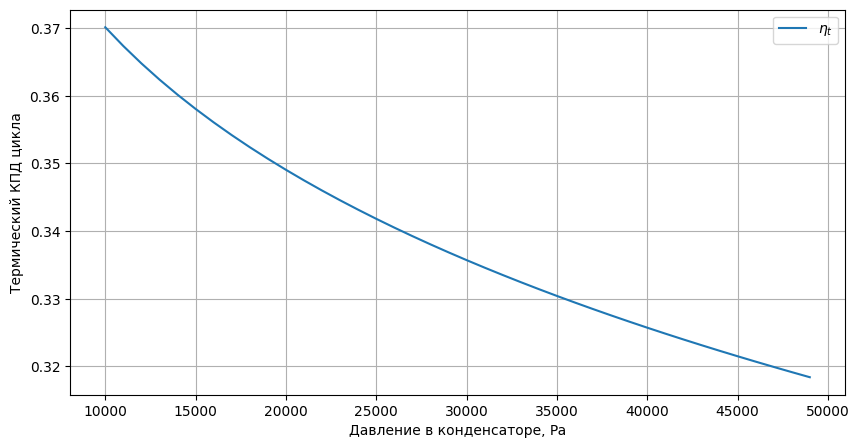

In [26]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(var_p_k, efficiencies, label='$\eta_t$')
ax.set_xlabel("Давление в конденсаторе, Pa")
ax.set_ylabel("Термический КПД цикла")
ax.legend()
ax.grid();

In [55]:
from ipywidgets import interact, FloatSlider


def plot_efficiency(p_0, t_0):
    var_p_k = range(10, 50, 1)
    var_p_k = list(map(lambda x: x * kPa, var_p_k))
    var_p_k[:10]

    efficiencies = []

    for p_k in var_p_k:
        efficiency = solve_exercise(p_0=p_0, t_0=t_0, p_k=p_k)
        efficiencies.append(efficiency)

    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    ax.set_ylim(0, 0.6)
    ax.plot(var_p_k, efficiencies, label='$\eta_t$')
    ax.set_xlabel("Давление в конденсаторе, Pa")
    ax.set_ylabel("Термический КПД цикла")
    ax.set_title(f"КПД при давлении $P_0$={round(p_0 / MPa, 1)} MPa, температуре $t_0$: {t_0} по Цельсию")
    ax.legend()
    ax.grid();

interact(
    plot_efficiency,
    p_0=FloatSlider(min=1 * MPa, max=10 * MPa, step=1*MPa, value=1*MPa),
    t_0=FloatSlider(min=100, max=700, step=10, value=10),
);

interactive(children=(FloatSlider(value=1000000.0, description='p_0', max=10000000.0, min=1000000.0, step=1000…

## Задача 1.5

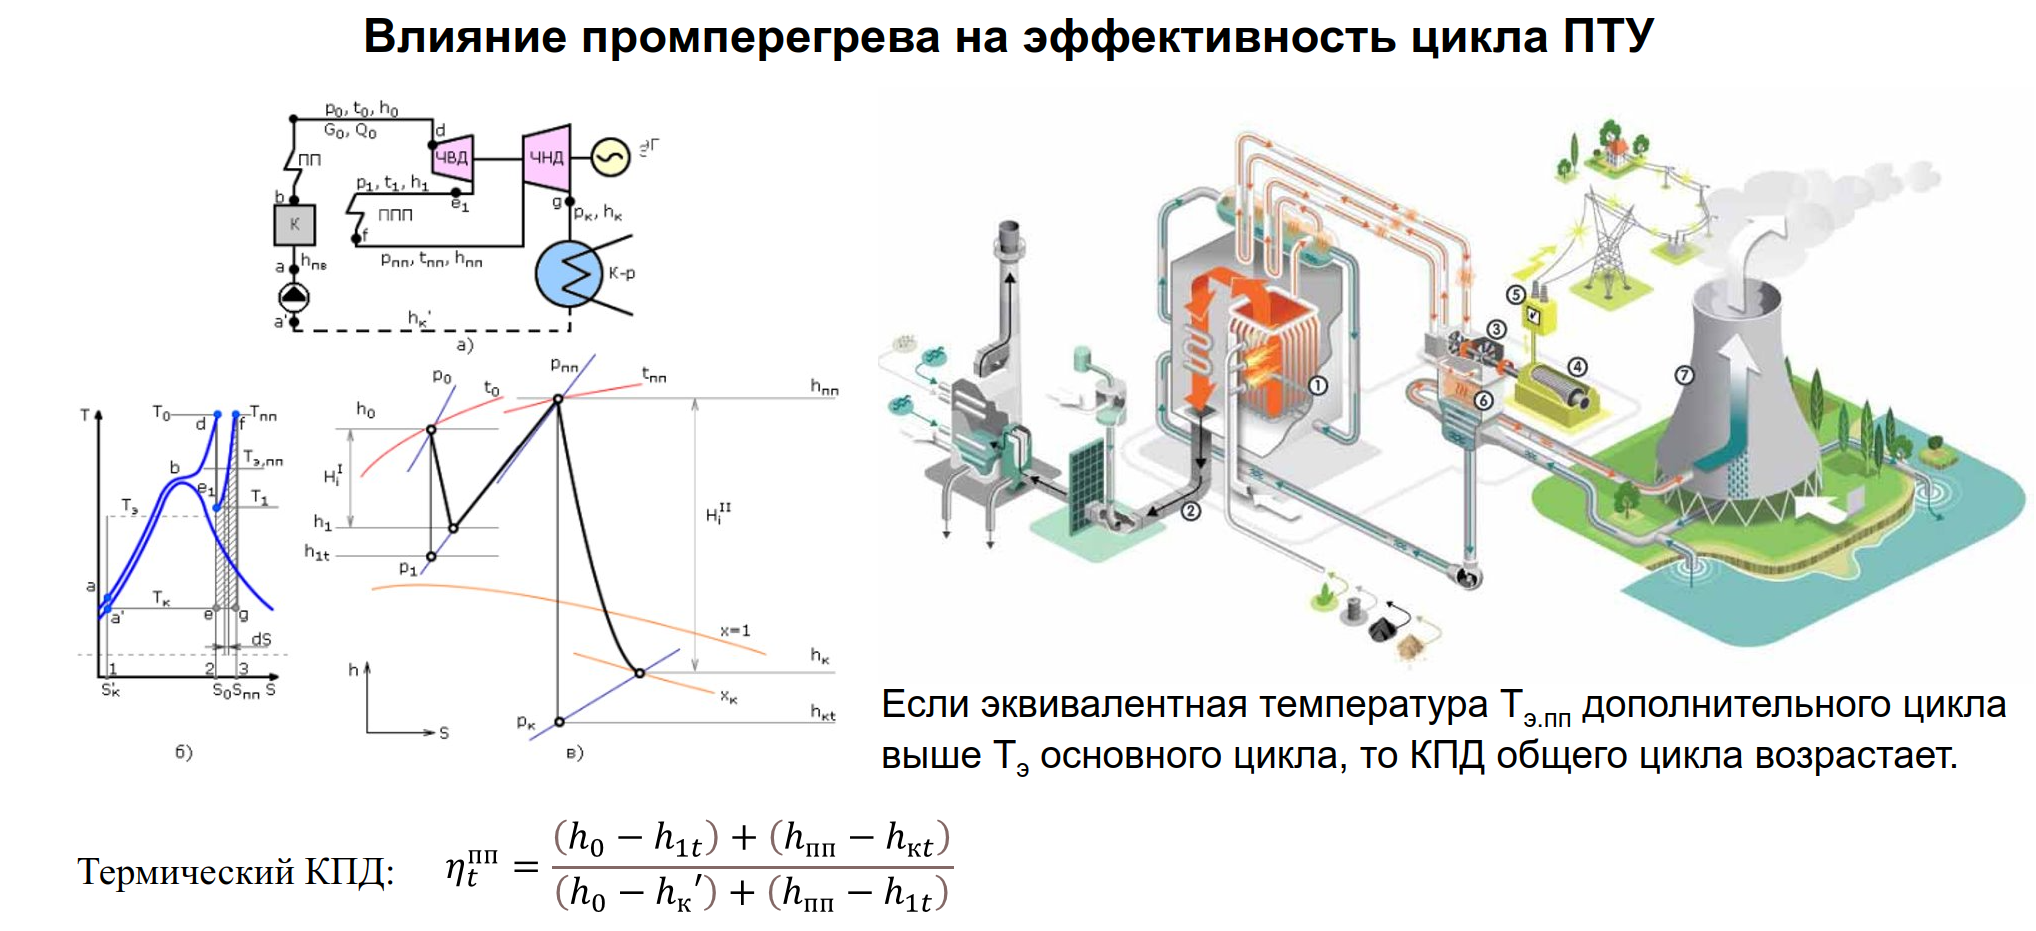

Оценить влияние промежуточного перегрева водяного пара на КПД ПТУ для условий примера `1.3`:

$Р_0$=13 МПа, $t_0$=520 °С, $Р_к$=5 кПа. Параметры промперегрева: $Р_{п.п.}$=2.5 МПа; $t_{п.п.}$=520 °С.

In [27]:
p_0 = 13 * MPa
t_0 = to_kelvin(520)
p_k = 5 * kPa
p_middle = 2.5 * MPa
t_middle = to_kelvin(520)

In [28]:
point_0_start = gas(P=p_0 * unit, T=t_0)

point_0_end = gas(P=p_middle * unit, s=point_0_start.s)

point_1_start = gas(P=p_middle * unit, T=t_middle)

point_condenser = gas(P=p_k * unit, s=point_1_start.s)

point_pump = gas(P=p_k * unit, x=0)

In [29]:
useful_energy = (point_0_start.h - point_0_end.h) + (point_1_start.h - point_condenser.h)
full_energy = (point_0_start.h - point_pump.h) + (point_1_start.h - point_0_end.h)

efficiency = useful_energy / full_energy
efficiency

0.4478129711672064

In [30]:
efficiency_old = solve_exercise(p_0=p_0, t_0=t_0-273.15, p_k=p_k)

difference_in_percent = (efficiency - efficiency_old) / efficiency_old
print("Ответ на задачу 1.5:", round(difference_in_percent * 100, 3), "%")

Ответ на задачу 1.5: 3.534 %


## Задача 1.5 (a)

Оценить влияние гидравлических потерь $ΔР_{п.п.}$ = 0.1 Рпп в тракте промежуточного перегрева водяного пара на термическое КПЛ ПТУ для условий примера `1.5`: $Р_0$=13 МПа, $t_0$=520 °С, $Р_к$=5 кПа. Параметры промперегрева: $Р_{п.п.}$=2.5 МПа; $t_{п.п.}$=520 °С. Оценить изменение термического КПД относительно `1.5`

In [31]:
p_0 = 13 * MPa
t_0 = to_kelvin(520)
p_k = 5 * kPa
p_middle = 2.5 * MPa
t_middle = to_kelvin(520)
p_0_end = p_middle + 0.1 * p_middle

In [32]:
point_0_start = gas(P=p_0 * unit, T=t_0)

point_0_end = gas(P=p_0_end * unit, s=point_0_start.s)

point_1_start = gas(P=p_middle * unit, T=t_middle)

point_condenser = gas(P=p_k * unit, s=point_1_start.s)

point_pump = gas(P=p_k * unit, x=0)

In [33]:
efficiency_old = efficiency

useful_energy = (point_0_start.h - point_0_end.h) + (point_1_start.h - point_condenser.h)
full_energy = (point_0_start.h - point_pump.h) + (point_1_start.h - point_0_end.h)

efficiency = useful_energy / full_energy
efficiency

0.44460024913137625

In [34]:
difference_in_percent = (efficiency - efficiency_old) / efficiency_old
print("Ответ на задачу 1.5 (a):", round(difference_in_percent * 100, 3), "%")

Ответ на задачу 1.5 (a): -0.717 %


## Задача 1.5 (б) 

В Домашней работе

## Задача 1.6

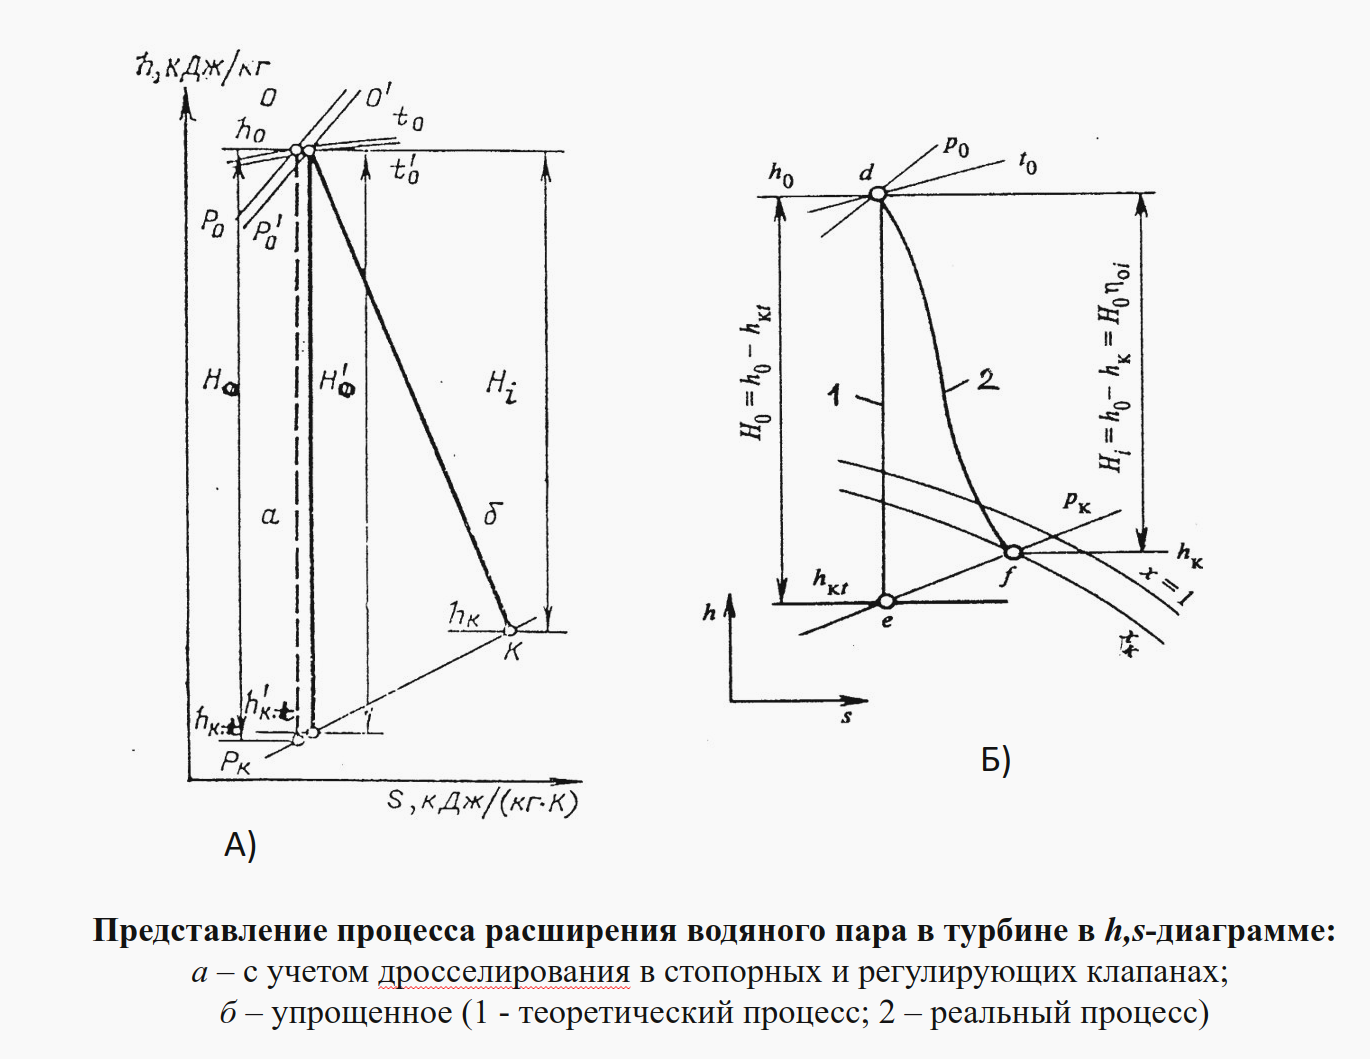

Оценить относительный внутренний КПД $\eta_{oi}$ части высокого давления ЧВД турбины с промперегревом при $Р_0$=13 МПа; $t_0$=520 °С и давлении $Р_1$=2,75 МПа. Известен удельный объем пара $v_1$ = 0,09422 $м^3/кг$.

In [35]:
p_0 = 13 * MPa
t_0 = to_kelvin(540)

p_1 = 2.75 * MPa
v_1 = 0.09422

In [36]:
point_0 = gas(P=p_0 * unit, T=t_0)
point_1 = gas(P=p_1 * unit, s=point_0_start.s)
point_1_real = gas(P=p_1 * unit, v=v_1)

In [37]:
theoretical_heat_drop = point_0.h - point_1.h

In [38]:
try:
    real_heat_drop = point_0.h - point_1_real.h
except AttributeError as error:
    print(error)

'IAPWS97' object has no attribute 'h'


Тут мы грустим, поскольку библиотека не может в вычисление параметров по давлению и объему =(

In [39]:
from scipy.optimize import minimize

def error(t):
    v = gas(P=p_1 * unit, T=float(to_kelvin(t))).v
    return (v-v_1) ** 2

t = float(minimize(error, 600, tol=1e-8).x)

In [40]:
point_1_real = gas(P=p_1 * unit, T=to_kelvin(t))

point_1_real.v, v_1, (point_1_real.v - v_1)**2

(0.0942193669927501, 0.09422, 4.006981784196466e-13)

In [41]:
real_heat_drop = point_0.h - point_1_real.h
turbine_efficiency = real_heat_drop / theoretical_heat_drop
print("Ответ на задачу 1.6:", round(turbine_efficiency * 100, 3), "%")

Ответ на задачу 1.6: 78.512 %


## Задача 1.7

В домашней работе

## Задача 1.8

В домашней работе

## Задача 1.9

При удельном расходе водяного пара $d_0$= 3,0 кг/(кВт·ч) оценить расходы водяного пара для энергоблоков мощностью $N_{э1}$ = 300 МВт и $N_{э2}$ = 800 МВт.

$$ G_0 = \frac{d_{0} N_{э}}{3600} $$

In [42]:
d_0 = 3
N_1 = 300 * 10**6
N_2 = 800 * 10 ** 6 

mass_flow_first = d_0 * N_1 / 3600
mass_flow_second = d_0 * N_2 / 3600

print(
    "Ответ на задачу 1.9:\n",
    round(mass_flow_first, 3), "Кг/c Для первой турбины\n",
    round(mass_flow_second, 3), "Кг/c Для второй турбины"
)

Ответ на задачу 1.9:
 250000.0 Кг/c Для первой турбины
 666666.667 Кг/c Для второй турбины


## Задача 1.10 

В домашней работе